# Visualising Global Temperature Data

This notebook is part of Assignment 1 of the Data Visualisation course offered by coursera.

In [1]:
import matplotlib.pylab as pl

In [2]:
import pandas as pd
import numpy as np

# 1. Read the data in

Out of interest, let's have quick look at the data being provided by coursera.

In [3]:
data_path_1 = 'data/Programming Assignment 1 Data New/'

In [4]:
season_dat = pd.read_csv(data_path_1 + 'ExcelFormattedGISTEMPDataCSV.csv')

In [5]:
season_dat.head(2)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-29,-19,-17,-27,-13,-28,-22,-6,-16,-15,-18,-20,-19,***,****,-19,-19,-16
1,1881,-8,-13,2,-2,-3,-27,-5,-1,-8,-18,-25,-14,-10,-11,-13,-1,-11,-17


In [6]:
season_dat.tail(2)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
134,2014,74,50,77,78,86,66,58,82,90,86,68,79,75,74,64,81,69,81
135,2015,82,88,90,74,76,80,****,****,****,****,****,****,****,***,83,80,****,****


In [7]:
season_dat.shape

(136, 19)

In [8]:
hem_data = pd.read_csv(data_path_1 + 'ExcelFormattedGISTEMPData2CSV.csv')

In [9]:
hem_data.shape

(135, 15)

In [10]:
hem_data.head(2)

,Year,Glob,NHem,SHem,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
0,1880,-19,-33,-5,-38,-16,-5,-89,-54,-22,-26,-5,-2,-8,39
1,1881,-10,-18,-2,-27,-2,-5,-54,-40,-14,-5,2,-6,-3,37


In [11]:
hem_data.tail(2)

,Year,Glob,NHem,SHem,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
133,2013,66,76,56,88,58,54,123,103,68,57,58,64,30,67
134,2014,75,91,58,106,67,54,185,113,76,70,64,76,23,47


# 2. Global Temperatures

Note: values are in Celsius * 100.

In [12]:
# clean the data a little first:
hem_data.columns

Index(['Year', 'Glob', 'NHem', 'SHem', '24N-90N', '24S-24N', '90S-24S',
       '64N-90N', '44N-64N', '24N-44N', 'EQU-24N', '24S-EQU', '44S-24S',
       '64S-44S', '90S-64S'],
      dtype='object')

In [13]:
hem_data.columns = [x.upper() for x in hem_data.columns]

In [14]:
hem_data.set_index('YEAR', inplace=True)

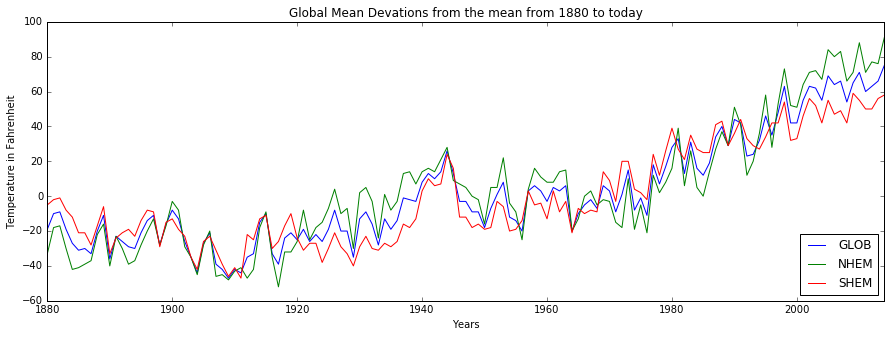

In [15]:
pl.figure(figsize=(15, 5))

for i in hem_data.columns[0:3]:
    
    pl.plot(hem_data.index, hem_data[i], label=i)

pl.title('Global Mean Devations from the mean from 1880 to today')
pl.xlim(hem_data.index.min(), hem_data.index.max())
pl.xlabel('Years')
pl.ylabel('Temperature in Fahrenheit')
pl.legend(loc='lower right')
pl.show()

Let's have a look at monthly averages and see if we can extract any more...

In [16]:
season_dat.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON'],
      dtype='object')

In [17]:
season_dat.tail(2)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
134,2014,74,50,77,78,86,66,58,82,90,86,68,79,75,74,64,81,69,81
135,2015,82,88,90,74,76,80,****,****,****,****,****,****,****,***,83,80,****,****


In [18]:
season_dat.replace('****', np.nan, inplace=True)
season_dat.replace('***', np.nan, inplace=True)

In [19]:
season_dat.columns = [x.upper() for x in season_dat.columns]

In [20]:
season_dat.columns = [x.upper() for x in season_dat.columns]
season_dat.set_index('YEAR', inplace=True)

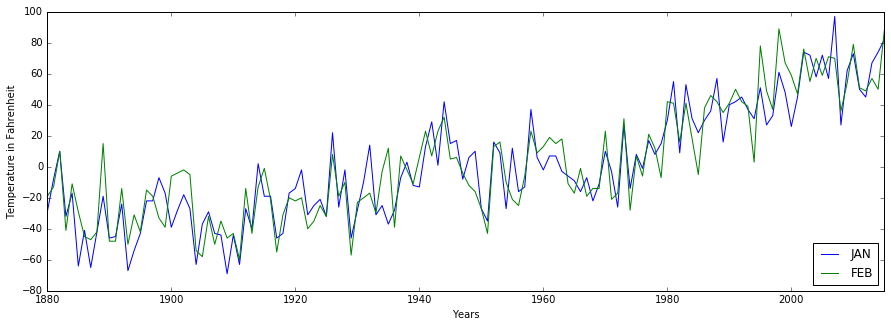

In [21]:
pl.figure(figsize=(15, 5))

for i in season_dat.columns[0:2]:
    pl.plot(season_dat.index, season_dat[i], label=i)

# pl.title('Global Mean Temperatures from 1880 to today')
pl.xlim(season_dat.index.min(), season_dat.index.max())
pl.xlabel('Years')
pl.ylabel('Temperature in Fahrenheit')
pl.legend(loc='lower right')
pl.show()

What we're really interested in showing is how each month got warmer or colder over time, or if that's too complicated than show how the seasons have evolved over time. The question is **HOW?**

Can start by asking ourselves some questions:


- did one hemisphere 'heat up' faster than another?
- similar to the above, can we pinpoint a specific latitude? (i.e. if we were to eventually display the latitude on a map, would industrial cities pop up?)
- what was the highest ever temperature in July? more generally, display global records.
- ...

JAN


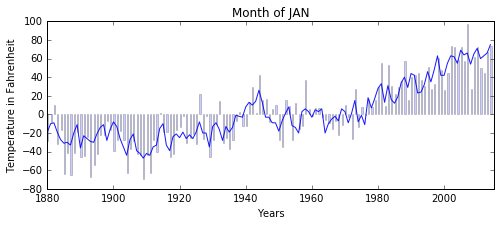

FEB


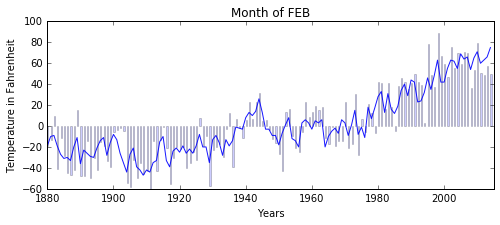

In [22]:
# try a bar chart for a single month:
for i in season_dat.columns[0:2]:
    print(i)
    if i in ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN']:
        tmp = season_dat[i]
    else:
        tmp = tmp[[i]][:-1]
    
    pl.figure(figsize=(8, 3))
    index = season_dat.index
    bar_width = 0.35
    pl.bar(tmp.index, tmp, bar_width, alpha=0.2, color='b')
    pl.plot(hem_data.index, hem_data.GLOB, label='global', alpha=0.9, linewidth=1)
    # plt.xticks(index + bar_width, ('A', 'B', 'C', 'D', 'E'))
    
    pl.title('Month of ' + i)
    pl.xlim(season_dat.index.min(), season_dat.index.max())
    pl.xlabel('Years')
    pl.ylabel('Temperature in Fahrenheit')
    pl.show()

Can't really get this to show anything interesting..

Next plan: plot 12 months for selected years, e.g. 1880, 1940, 2000 and then today as a start.

In [23]:
season_dat.head(2)

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,J-D,D-N,DJF,MAM,JJA,SON
YEAR,,,,,,,,,,,,,,,,,,
1880,-29,-19,-17,-27,-13,-28,-22,-6,-16,-15,-18,-20,-19,NaN,NaN,-19,-19,-16
1881,-8,-13,2,-2,-3,-27,-5,-1,-8,-18,-25,-14,-10,-11,-13,-1,-11,-17


In [24]:
season_dat.columns

Index(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT',
       'NOV', 'DEC', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON'],
      dtype='object')

In [25]:
MONTHS = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT',
       'NOV', 'DEC']

In [26]:
YEARS = [1880, 1940, 2000, 2016]

In [27]:
tmp = season_dat[season_dat.index.isin(YEARS)]
tmp = tmp[MONTHS]

In [28]:
test = pd.DataFrame(tmp.T)

In [29]:
test.columns = ['year_' + str(x) for x in test.columns]

In [30]:
for x in test.columns:
    test[x] = pd.to_numeric(test[x])

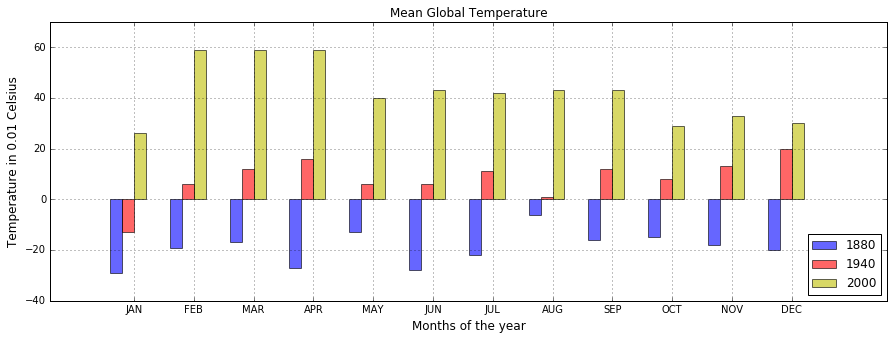

In [31]:
# Add 2015 or 2016
# Add another plot with northern / southern hemisphere

pl.figure(figsize=(15, 5))

index = np.arange(12)
bar_width = 0.20
opacity = 0.6

year_1880 = test.year_1880.values
year_1940 = test.year_1940.values
year_2000 = test.year_2000.values

rects1 = pl.bar(index, year_1880, bar_width,
                 alpha=opacity,
                 color='b',
                 label='1880')

rects2 = pl.bar(index + bar_width, year_1940, bar_width,
                 alpha=opacity,
                 color='r',
                 label='1940')

rects3 = pl.bar(index + bar_width * 2, year_2000, bar_width,
                 alpha=opacity,
                 color='y',
                 label='2000')

pl.ylim(-40, 70)
pl.xlim(-1, 13)
pl.xlabel('Months of the year', size=12)
pl.ylabel('Temperature in 0.01 Celsius', size=12)
pl.xticks(index + bar_width * 2, ('JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT',
       'NOV', 'DEC'))

pl.legend(loc='lower right')
pl.title('Mean Global Temperature')
pl.grid()
pl.show()

# 3. Using the NASA datasets directly:

I downloaded the data from the NASA website directly. Let's pull in the monthly data for the 2 hemispheres:

In [32]:
northern = pd.read_csv('data/NH.Ts+dSST.csv', header=1)
northern.columns = [x.upper() for x in northern.columns]
northern.set_index('YEAR', inplace=True)

In [33]:
southern = pd.read_csv('data/SH.Ts+dSST.csv', header=1)
southern.columns = [x.upper() for x in southern.columns]
southern.set_index('YEAR', inplace=True)

In [34]:
northern.head(1)

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,J-D,D-N,DJF,MAM,JJA,SON
YEAR,,,,,,,,,,,,,,,,,,
1880,-0.54,-0.44,-0.3,-0.47,-0.12,-0.27,-.29,-.29,-.34,-.27,-.39,-.41,-.34,***,***,-0.3,-.29,-.33


In [35]:
southern.head(1)

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,J-D,D-N,DJF,MAM,JJA,SON
YEAR,,,,,,,,,,,,,,,,,,
1880,-0.05,0.03,-0.06,-0.08,-0.17,-0.3,-.18,.14,.01,-.05,.02,-.01,-.06,***,***,-0.1,-.11,-.01


In [36]:
glob = pd.read_csv('data/GLB.Ts.csv', header=1)

In [37]:
glob.columns = [x.upper() for x in glob.columns]
glob.set_index('YEAR', inplace=True)

In [38]:
glob.head(2)

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,J-D,D-N,DJF,MAM,JJA,SON
YEAR,,,,,,,,,,,,,,,,,,
1880,-0.83,-0.40,-0.48,-0.67,-0.37,-0.49,-.49,.06,-.51,-.68,-.52,-.54,-.49,***,***,-0.51,-.31,-.57
1881,-0.77,-0.62,-0.36,-0.27,-0.04,-1.14,-.54,-.27,-.35,-.49,-.58,-.14,-.47,-.50,-.64,-0.22,-.65,-.47


So let's plot the same but in subplots sharing the same x-axis.

In [39]:
def plot_months(ax, index, bar_values, label=None, color='b', alpha=0.7, bar_width=0.2):
    
    if label is None:
        
        ax.bar(index, bar_values, bar_width,
                     alpha=alpha,
                     color=color)
    else:
        ax.bar(index, bar_values, bar_width,
                     alpha=alpha,
                     color=color,
                     label=label)

Let's start by plotting year 1880 for global, northern, and southern hemisphere.

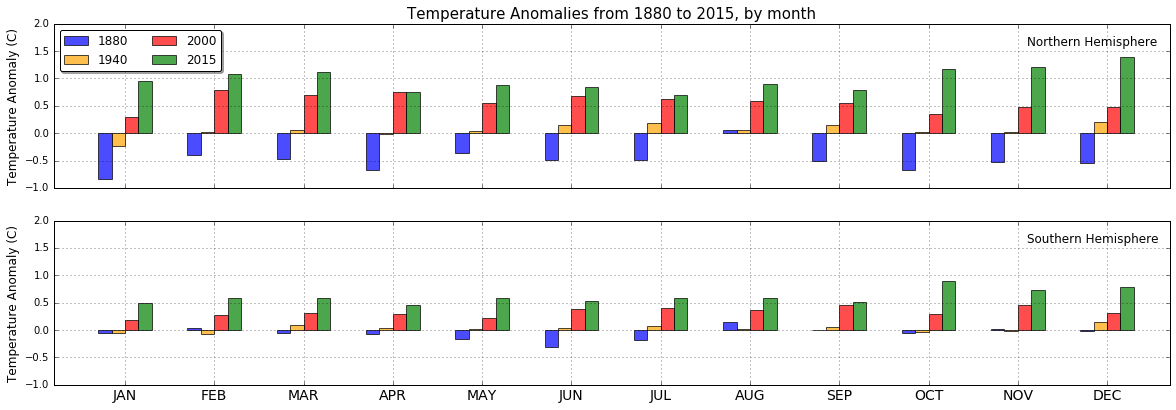

In [40]:
from matplotlib.font_manager import FontProperties

font0 = FontProperties()
YEARS = [1880, 1940, 2000, 2015]
bar_width = 0.15
pl.figure(figsize=(20, 10))
index = np.arange(12)
COLORS = ['blue', 'orange', 'red', 'green']
# COLORS = ['blue', 'green', 'orange', 'red']

ax1 = pl.subplot(311)

for k, year in enumerate(YEARS):
    tmp_1 = glob[glob.index==year][MONTHS]
    for x in tmp_1.columns:
        tmp_1[x] = pd.to_numeric(tmp_1[x])
        tmp_1.replace('****', np.nan, inplace=True)
        tmp_1.replace('***', np.nan, inplace=True)
    plot_months(ax1, index + bar_width * k, tmp_1.values.ravel(), bar_width=bar_width, color=COLORS[k], 
                label=str(year))

ax1.grid()
ax1.set_ylim(-1, 1)
ax1.set_ylabel('Temperature Anomaly (C)', size=12)
pl.setp(ax1.get_xticklabels(), visible=False)
ax1.legend(loc='upper left', ncol=2, fancybox=True, shadow=True) #, bbox_to_anchor=(1, 1.2))
font1 = font0.copy()
ax1.text(10.4, 1.6, 'Northern Hemisphere', color='black',  size=12,
        bbox=dict(facecolor='none', edgecolor='none', boxstyle=None))#, fontproperties=font0.set_weight('bold'))


# # share x only
ax2 = pl.subplot(312, sharex=ax1, sharey=ax1)
for k, year in enumerate(YEARS):
    tmp_2 = southern[southern.index==year][MONTHS]
    for x in tmp_2.columns:
        tmp_2[x] = pd.to_numeric(tmp_2[x])
        tmp_2.replace('****', np.nan, inplace=True)
        tmp_2.replace('***', np.nan, inplace=True)
    plot_months(ax2, index + bar_width * k, tmp_2.values.ravel(), bar_width=bar_width, color=COLORS[k], 
                label=str(year))

ax2.grid()
ax2.set_ylim(-1, 1)
ax2.set_ylabel('Temperature Anomaly (C)', size=12)
ax2.set_xticks(index + bar_width * 2)
ax2.set_xticklabels( ('JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT',
       'NOV', 'DEC'), size=14)
pl.xlim(-0.5, 12)
pl.ylim(-1, 2)
ax1.set_title('Temperature Anomalies from 1880 to 2015, by month', size=15)
ax2.text(10.4, 1.6, 'Southern Hemisphere', color='black',  size=12,
        bbox=dict(facecolor='none', edgecolor='none', boxstyle=None)) #, fontproperties=font0.weight('bold'))


pl.tight_layout
# pl.savefig('temp_anomalies.png')
pl.show()
